In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import tensorflow.keras as keras

In [2]:
FILE_PATH = 'data/weatherAUS_cleaned.csv'

In [3]:
# Get cleaned data from csv
df = pd.read_csv(FILE_PATH)
df.loc[:, "Date"] = pd.to_datetime(df.loc[:, "Date"])
df

,Date,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Rain
0,2009-01-01 00:00:00,17.7,35.1,9.8,12.9,63.0,13.0,1005.3,1000.2,22.9,34.0,0.0
1,2009-01-02 00:00:00,18.5,23.0,11.0,5.9,63.0,58.0,1012.9,1014.1,20.6,20.1,0.0
2,2009-01-03 00:00:00,16.9,23.2,9.0,0.5,52.0,50.0,1021.8,1019.4,18.9,22.0,0.0
3,2009-01-04 00:00:00,18.7,27.1,5.4,11.3,60.0,51.0,1018.5,1014.9,22.9,25.9,0.0
4,2009-01-05 00:00:00,20.2,31.6,10.0,12.2,58.0,52.0,1013.2,1008.0,24.9,29.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3004,2017-06-21 00:00:00,8.6,18.6,2.0,7.8,69.0,67.0,1025.7,1025.3,13.3,17.7,0.2
3005,2017-06-22 00:00:00,9.5,17.8,2.0,9.2,74.0,70.0,1028.3,1024.6,14.3,16.8,0.2
3006,2017-06-23 00:00:00,8.7,19.4,2.4,2.7,83.0,57.0,1020.8,1014.7,10.9,18.2,0.0
3007,2017-06-24 00:00:00,9.4,19.9,1.4,9.3,61.0,41.0,1017.3,1015.2,12.9,19.3,0.0


## Segui o modelo do link
https://keras.io/examples/timeseries/timeseries_weather_forecasting/ 

In [34]:
# Standardize dataset

def get_data_params(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    data_min = data[:train_split].min(axis=0)
    data_max = data[:train_split].max(axis=0)
    return data_mean, data_std, data_min, data_max


def standardize(data, data_mean, data_std):
    return (data - data_mean) / data_std


def unstandardize(data, data_mean, data_std):
    return (data * data_std) + data_mean

# Normalize dataset

def normalize(data, data_min, data_max):
    return (data - data_min) / (data_max - data_min)


def unnormalize(data, data_min, data_max):
    return (data * (data_max - data_min)) + data_min

# Model params
split_fraction = 0.7
train_split = int(split_fraction * int(df.shape[0]))
step = 1

past = 30
future = 0
learning_rate = 0.001
batch_size = 128
epochs = 50

# Split date
features = df.drop(columns=["Date"])
data_mean, data_std, data_min, data_max = get_data_params(features.values, train_split)
features = standardize(features.values, data_mean=data_mean, data_std=data_std)
# features = normalize(features.values, data_min=data_min, data_max=data_max)
features = pd.DataFrame(features)

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

val_data

,0,1,2,3,4,5,6,7,8,9,10
2106,0.750000,0.386905,0.543478,0.250000,0.784091,0.697917,0.550000,0.620545,0.516854,0.381503,0.000000
2107,0.780172,0.476190,0.217391,0.867647,0.852273,0.531250,0.585714,0.641509,0.558052,0.491329,0.000000
2108,0.818966,0.556548,0.358696,0.911765,0.477273,0.375000,0.576190,0.597484,0.734082,0.566474,0.000000
2109,0.784483,0.535714,0.500000,0.955882,0.488636,0.416667,0.471429,0.463312,0.689139,0.578035,0.000000
2110,0.827586,0.610119,0.739130,0.639706,0.590909,0.500000,0.340476,0.375262,0.726592,0.563584,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3004,0.232759,0.172619,0.108696,0.573529,0.647727,0.666667,0.700000,0.754717,0.209738,0.213873,0.001873
3005,0.271552,0.148810,0.108696,0.676471,0.704545,0.697917,0.761905,0.740042,0.247191,0.187861,0.001873
3006,0.237069,0.196429,0.130435,0.198529,0.806818,0.562500,0.583333,0.532495,0.119850,0.228324,0.000000
3007,0.267241,0.211310,0.076087,0.683824,0.556818,0.395833,0.500000,0.542977,0.194757,0.260116,0.000000


In [35]:
# Train Dataset
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(len(df.columns)-1)]].values
y_train = features.iloc[start:end][[len(df.columns)-2]]

sequence_length = int(past / step)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [36]:
# Validation data
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(len(df.columns)-1)]].values
y_val = features.iloc[label_start:][[len(df.columns)-2]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (128, 30, 11)
Target shape: (128, 1)


In [37]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 30, 11)]          0         
                                                                 
 lstm_6 (LSTM)               (None, 32)                5632      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5665 (22.13 KB)
Trainable params: 5665 (22.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
path_checkpoint = "weights/model_checkpoint.h5"

es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=20)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/50
14/17 [=======================>......] - ETA: 0s - loss: 0.0163
Epoch 1: val_loss improved from inf to 0.01115, saving model to weights\model_checkpoint.h5
17/17 [==============================] - 3s 44ms/step - loss: 0.0155 - val_loss: 0.0111
Epoch 2/50
15/17 [=========================>....] - ETA: 0s - loss: 0.0093
Epoch 2: val_loss improved from 0.01115 to 0.00904, saving model to weights\model_checkpoint.h5
17/17 [==============================] - 0s 18ms/step - loss: 0.0094 - val_loss: 0.0090
Epoch 3/50
14/17 [=======================>......] - ETA: 0s - loss: 0.0075
Epoch 3: val_loss improved from 0.00904 to 0.00823, saving model to weights\model_checkpoint.h5
17/17 [==============================] - 0s 19ms/step - loss: 0.0075 - val_loss: 0.0082
Epoch 4/50
15/17 [=========================>....] - ETA: 0s - loss: 0.0066
Epoch 4: val_loss improved from 0.00823 to 0.00771, saving model to weights\model_checkpoint.h5
17/17 [==============================] - 0s 18ms/step - 

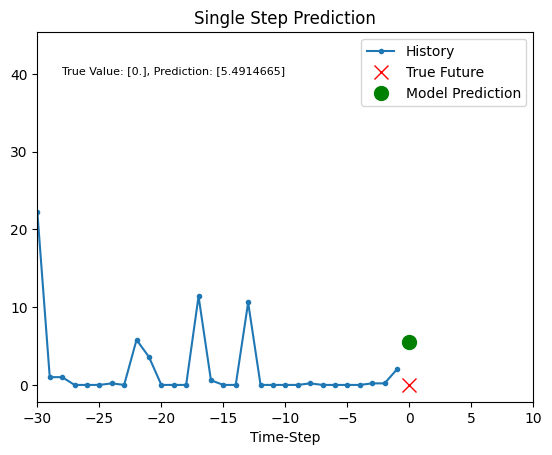

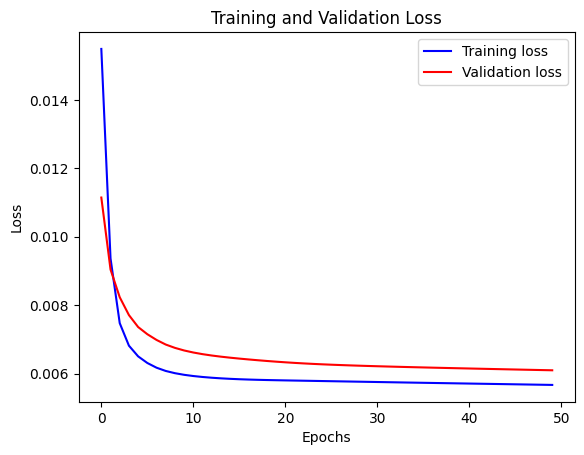

In [39]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

4/4 [==============================] - 0s 3ms/step


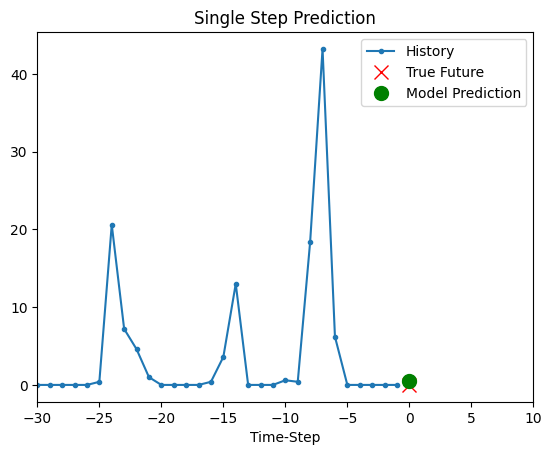

True Value: [0.], Prediction: [0.44197372]


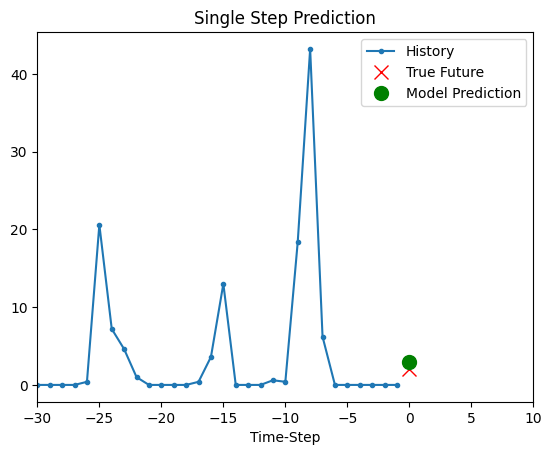

True Value: [2.], Prediction: [2.9214625]


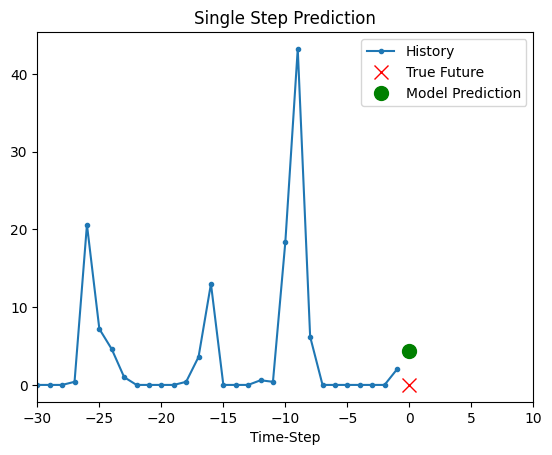

True Value: [0.], Prediction: [4.338011]


In [40]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, _ in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return 

for x, y in dataset_val.take(1):
    pred = unstandardize(model.predict(x), data_mean=data_mean[-1], data_std=data_std[-1])
    x = unstandardize(x.numpy(), data_mean=data_mean, data_std=data_std)
    y = unstandardize(y.numpy(), data_mean=data_mean[-1], data_std=data_std[-1])
    # pred = unnormalize(model.predict(x), data_min=data_min[-1], data_max=data_max[-1])
    # x = unnormalize(x.numpy(), data_min=data_min, data_max=data_max)
    # y = unnormalize(y.numpy(), data_min=data_min[-1], data_max=data_max[-1])
    for i in range(3):
        show_plot(
            [x[i][:, -1], 
            y[i], 
            pred[i]],
            future,
            "Single Step Prediction",
        )
        print(f"True Value: {y[i]}, Prediction: {pred[i]}")

In [41]:
plt.rcParams['animation.html'] = 'jshtml'
plt.rcParams['figure.dpi'] = 100
plt.ioff()

delta = 0
title = "Single Step Prediction"

fig, ax = plt.subplots()

for x, y in dataset_val.take(1):
    pred = unstandardize(model.predict(x), data_mean=data_mean[-1], data_std=data_std[-1])
    x = unstandardize(x.numpy(), data_mean=data_mean, data_std=data_std)
    y = unstandardize(y.numpy(), data_mean=data_mean[-1], data_std=data_std[-1])
    # pred = unnormalize(model.predict(x), data_min=data_min[-1], data_max=data_max[-1])
    # x = unnormalize(x.numpy(), data_min=data_min, data_max=data_max)
    # y = unnormalize(y.numpy(), data_min=data_min[-1], data_max=data_max[-1])
    plot_data = [x[0][:, -1], 
                y[0], 
                pred[0]]
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    plt_elements = [0, 0, 0]
    for i, _ in enumerate(plot_data):
        if i:
            plt_elements[i] = ax.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])[0]
        else:
            plt_elements[i] = ax.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])[0]
    plt_elements.append(plt.text(-28, 40, f"True Value: {y[i]}, Prediction: {pred[i]}", dict(size=8)))
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")


def update(frame):
    # For each frame, update the data stored on each artist.
    plot_data = [x[frame][:, -1], 
                y[frame], 
                pred[frame]]
    # Update plot elements:
    for i, _ in enumerate(plot_data):
        if i:
            plt_elements[i].set_xdata(future)
            plt_elements[i].set_ydata(plot_data[i])
        else:
            plt_elements[i].set_xdata(time_steps)
            plt_elements[i].set_ydata(plot_data[i].flatten())
        plt_elements[-1].set_text(f"True Value: {y[frame]}, Prediction: {pred[frame]}")
    return tuple(plt_elements)


anim = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=2000)
anim

4/4 [==============================] - 0s 4ms/step


C:\Users\joaof\AppData\Local\Temp\ipykernel_8608\3159552896.py:49: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  plt_elements[i].set_xdata(future)
